## Loading the Breast Cancer Wiscosin Dataset

In [1]:
import pandas as pd
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer


cancer = load_breast_cancer()

cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

   ## Converting Dataset to Dataframes

In [2]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Training and testing dataset

In [3]:
X = df.drop('target',axis = 1)
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)


## Using KNN for training

In [4]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

## Predict the class label using the mean value for each feature

In [5]:
means = df.mean()[:-1].values.reshape(1, -1)
knn.predict(means)

array([1])

## Predicting Values of labels for Test set

In [6]:
knn.predict(X_test)

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

## Checking accuracy of classifier

In [7]:
knn.score(X_test, y_test)

0.916083916083916

## Accuracy Plot

<IPython.core.display.Javascript object>


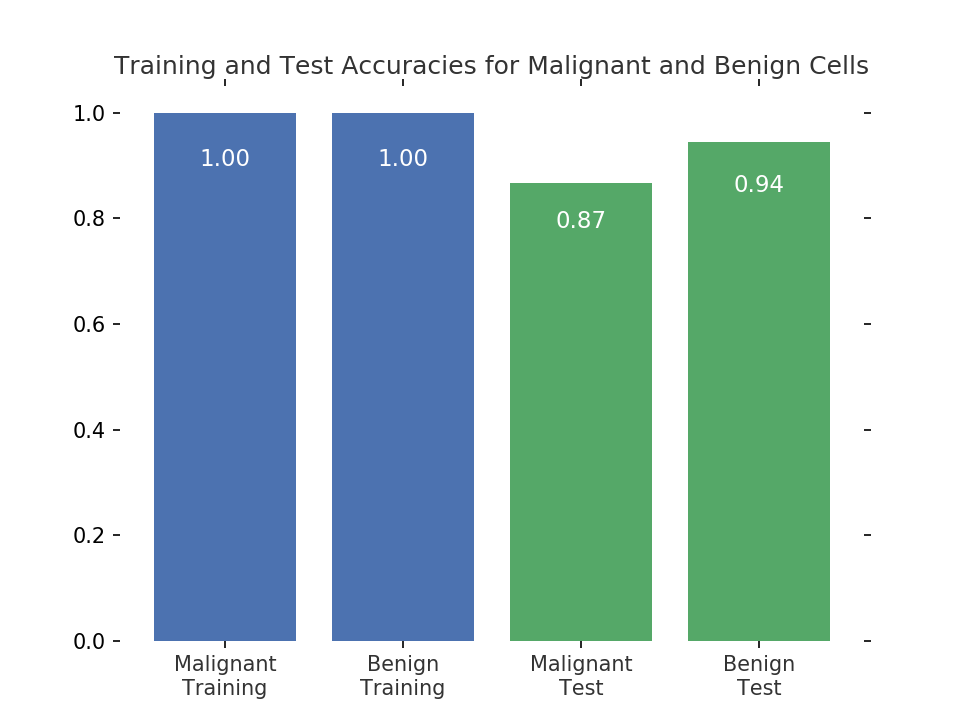

Text(0.5, 1.0, 'Training and Test Accuracies for Malignant and Benign Cells')

In [8]:
mal_train_X = X_train[y_train==0]
mal_train_y = y_train[y_train==0]
ben_train_X = X_train[y_train==1]
ben_train_y = y_train[y_train==1]

mal_test_X = X_test[y_test==0]
mal_test_y = y_test[y_test==0]
ben_test_X = X_test[y_test==1]
ben_test_y = y_test[y_test==1]


scores = [knn.score(mal_train_X, mal_train_y), knn.score(ben_train_X, ben_train_y), 
          knn.score(mal_test_X, mal_test_y), knn.score(ben_test_X, ben_test_y)]

plt.figure()

bars = plt.bar(np.arange(4), scores, color=['#4c72b0','#4c72b0','#55a868','#55a868'])

for bar in bars:
        height = bar.get_height()
        plt.gca().text(bar.get_x() + bar.get_width()/2, height*.90, '{0:.{1}f}'.format(height, 2), 
                     ha='center', color='w', fontsize=11)
        
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

for spine in plt.gca().spines.values():
        spine.set_visible(False)
    
plt.xticks([0,1,2,3], ['Malignant\nTraining', 'Benign\nTraining', 'Malignant\nTest', 'Benign\nTest'], alpha=0.8);
plt.title('Training and Test Accuracies for Malignant and Benign Cells', alpha=0.8)

## Using Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(X_train, y_train)

print("Accuracy on training set: {.:2f}", format(clf.score(X_train, y_train)))
print("Accuracy on testing set: {.:2f}", format(clf.score(X_test, y_test)))

Accuracy on training set: {.:2f} 0.9436619718309859
Accuracy on testing set: {.:2f} 0.9440559440559441


C:\Users\nirav\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [10]:
from sklearn.svm import LinearSVC

clf = LinearSVC(C = 0.1).fit(X_train, y_train)

print("Accuracy on training set: {.:2f}", format(clf.score(X_train, y_train)))
print("Accuracy on testing set: {.:2f}", format(clf.score(X_test, y_test))) 

Accuracy on training set: {.:2f} 0.9295774647887324
Accuracy on testing set: {.:2f} 0.9440559440559441


C:\Users\nirav\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## Neural Network

In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = MLPClassifier(hidden_layer_sizes = [100,100], solver = 'lbfgs', alpha = 5.0, 
                    random_state = 0).fit(X_train_scaled, y_train)

print("Accuracy on training set : {:.2f}".format(clf.score(X_train_scaled, y_train)))
print("Accuracy on test set : {:.2f}".format(clf.score(X_test_scaled, y_test)))

Accuracy on training set : 0.98
Accuracy on test set : 0.97
